In [2]:
data = []
# read each row for the data.txt and store it in a list
with open('./data/aoc1.txt') as f:
    data = f.readlines()
    # remove \n from each row
    data = [x.strip() for x in data]

# loop through the list and change string to int
for i in range(len(data)):
    data[i] = int(data[i])

Assignment 1.1

In [3]:
# function that checks if the first number is larger than the sencond number
def check_larger(first, second):
    if first > second:
        return True
    else:
        return False

In [4]:
count = 0
for x in range (1, len(data)):
    # split the row into a list
    if (check_larger(data[x], data[x-1])):
        count += 1

print(count)

1559


Assignment 1.2

In [5]:
# Sum 3 numbers
def sum_three(first, second, third):
    return first + second + third

noise_reduction_list = []

# loop through data and add the sum of the three numbers to the noise reduction list
for x in range(0, len(data)-2):
    noise_reduction_list.append(sum_three(data[x], data[x+1], data[x+2]))

# loop through the noise reduction list and check if the first number is larger than the second number
count = 0
for x in range(1, len(noise_reduction_list)):
    if (check_larger(noise_reduction_list[x], noise_reduction_list[x-1])):
        count += 1

print(count)


1600


Assignment 2.1

In [6]:
from enum import Enum


class Movement:
    def __init__(self, direction, distance):
        self.direction = direction
        self.distance = distance
    def __str__(self):
        return f"{self.direction} {self.distance}"

class MovementDirection(Enum):
    forward = 1
    up = 2
    down = 3

def GetMovementList():
    data = []
    with open('./data/aoc2.txt') as f:
        data = f.readlines()

    # split the data into a list
    for i in range(len(data)):
        temp = data[i].split(' ')
        # remove the \n from the end of the string
        temp[len(temp)-1] = temp[len(temp)-1].strip()
        data[i] = Movement(MovementDirection[temp[0]], int(temp[1]))
    return data

data = GetMovementList()
# Calculate the postion of the robot
def calculate_position(movement_list):
    x = 0
    z = 0
    for movement in movement_list:
        if movement.direction == MovementDirection.forward:
            x += movement.distance
        elif movement.direction == MovementDirection.up:
            z += movement.distance
        elif movement.direction == MovementDirection.down:
            z -= movement.distance
    return x, z

x,z = calculate_position(data)

print(f"The final position is: {x}, {z}")
print(f"The final position multiple: {x*-z}")

The final position is: 1988, -913
The final position multiple: 1815044


Assignment 2.2

In [7]:
# Calculate the postion of the robot with the new rules. Down decreases the aim. Up increases the aim. Forward increases the x distance and decreases the z multiplied by the aim.
def calculate_position_new(movement_list):
    aim = 0
    x = 0
    z = 0
    for movement in movement_list:
        if movement.direction == MovementDirection.forward:
            x += movement.distance
            z += aim * movement.distance
        elif movement.direction == MovementDirection.up:
            aim += movement.distance
        elif movement.direction == MovementDirection.down:
            aim -= movement.distance
    return x, z

data = GetMovementList()

x,z = calculate_position_new(data)

print(f"The final position is: {x}, {z}")
print(f"The final position multiple: {x*-z}")

The final position is: 1988, -874891
The final position multiple: 1739283308


Assignment 3.1

In [8]:
def GetGammaDataList():
    data = []
    with open('./data/aoc3.txt') as f:
        data = f.readlines()

    # remove \n from each row
    data = [x.strip() for x in data]
    return data
data = GetGammaDataList()

MostCommonBit=[]
for i in range(0,len(data[0])):
    MostCommonBit.append([0,0])
print(MostCommonBit)
# Count each bit in the string how many times it appears on the specific index
for i in range(len(data)):
    for j in range(len(data[i])):
        if data[i][j] == '0':
            MostCommonBit[j][0] += 1
        if data[i][j] == '1':
            MostCommonBit[j][1] += 1
print(MostCommonBit)

MostCommonByte = ''
# for each list item in the MostCommonBit list, check if the first number is larger than the second number. If is as '1' to Gamma and '0' to Beta
for i in range(len(MostCommonBit)):
    if MostCommonBit[i][1] > MostCommonBit[i][0]:
        MostCommonByte += '1'
    else:
        MostCommonByte += '0'

#string to bit array
print(MostCommonByte)
MostCommonByte = list(MostCommonByte)
MostCommonByte = [int(x) for x in MostCommonByte]

Gamma = 0
Epsilon = 0
for i in range(len(MostCommonByte)):
    if (MostCommonByte[i] == 1):
        Gamma += 2**(len(MostCommonByte)-i-1)
    else:
        Epsilon += 2**(len(MostCommonByte)-i-1)

print(f"{Gamma}, {Epsilon}")
print(f"{Gamma * Epsilon}")

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[521, 479], [520, 480], [502, 498], [509, 491], [479, 521], [503, 497], [486, 514], [488, 512], [501, 499], [507, 493], [516, 484], [491, 509]]
000010110001
177, 3918
693486


Assignment 3.2

In [9]:
def GetGammaDataList():
    data = []
    with open('./data/aoc3.txt') as f:
        data = f.readlines()

    # remove \n from each row
    data = [x.strip() for x in data]
    return data
data = GetGammaDataList()
print(len(data))
tempData = data.copy()
for i in range(len(data[0])):
    MostCommonBit=[0,0]
    for j in range(len(tempData)):
        if tempData[j][i] == '0':
            MostCommonBit[0] += 1
        if tempData[j][i] == '1':
            MostCommonBit[1] += 1

    
    if(not(MostCommonBit[0] == 0 or MostCommonBit[1] == 0)):
        most = []
        toggle = MostCommonBit[1] >= MostCommonBit[0]
        for j in range(len(tempData)):
            if toggle == (tempData[j][i] == '1'):
                most.append(tempData[j])
                
            if not toggle == (tempData[j][i] == '0'):
                most.append(tempData[j])
        tempData = most

Oxygen = tempData[0]


tempData = GetGammaDataList()
for i in range(len(data[0])):
    MostCommonBit=[0,0]
    
    for j in range(len(tempData)):
        if tempData[j][i] == '0':
            MostCommonBit[0] += 1
        if tempData[j][i] == '1':
            MostCommonBit[1] += 1

    if(not(MostCommonBit[0] == 0 or MostCommonBit[1] == 0)):
        least = []
        toggle = MostCommonBit[1] < MostCommonBit[0]
        for j in range(len(tempData)):
            if toggle == (tempData[j][i] == '1'):
                least.append(tempData[j])
                
            if not toggle == (tempData[j][i] == '0'):
                least.append(tempData[j])
        tempData = least

Co2 = tempData[0]


# bit string to int
def bit_string_to_int(bit_string):
    return 


print(f"{Oxygen}, {Co2}")
print(f"{int(Oxygen, 2)}, {int(Co2, 2)}")
print(f"{int(Oxygen, 2) * int(Co2, 2)}")
            



1000
001110100101, 111000100110
933, 3622
3379326


Assignment 4.1 + 2

In [10]:
import numpy as np
class BingoGame:
    def __init__(self, BingoCards, OrderOfDrawnNumbers):
        self.BingoCards = BingoCards
        self.OrderOfDrawnNumbers = OrderOfDrawnNumbers
        self.winner = []
        self.winningNumber = None
    def Play(self):
        completedCards = 0
        for number in self.OrderOfDrawnNumbers:
            for card in self.BingoCards:
                if card.rank == None:
                    card.MarkNumber(number)

            roundCards = 0
            for card in self.BingoCards:
                
                if card.rank == None:
                    if card.IsComplete():
                        
                        if completedCards == 0:
                            self.winningNumber = number
                            self.winner.append(card)
                        card.rank = completedCards+1
                        card.winning_number  = number
                        # print(f"{card.Name} is placed {card.rank}")
                        roundCards += 1
            completedCards += roundCards

            # Game is over
            if completedCards == len(self.BingoCards):
                break
            
        return self.winner

class BingoCard:
    def __init__(self, card_numbers):
        # split all the 
        self.board = card_numbers
        self.marked_numbers = np.zeros([5,5])
        self.rank = None
        self.winning_number = None

    def MarkNumber(self, number):
        location = self.LocationOnBoard(number)
        if (location != None):
            self.marked_numbers[location[0]][location[1]] = 1
    
    def IsComplete(self):
        # row is complete
        for i in range(5):
            if (self.marked_numbers[i][0] == 1 
            and self.marked_numbers[i][1] == 1 
            and self.marked_numbers[i][2] == 1 
            and self.marked_numbers[i][3] == 1 
            and self.marked_numbers[i][4] == 1):
                return True
        # column is complete
            if (self.marked_numbers[0][i] == 1 
            and self.marked_numbers[1][i] == 1 
            and self.marked_numbers[2][i] == 1 
            and self.marked_numbers[3][i] == 1 
            and self.marked_numbers[4][i] == 1):
                return True

    def LocationOnBoard(self, number):
        for i in range(5):
            for j in range(5):
                if self.board[i][j] == number:
                    return [i,j]
        return None

    # Get Completed Row or Column
    def GetCompletedRowOrColumn(self):
        for i in range(5):
            if (self.marked_numbers[i][0] == 1 
            and self.marked_numbers[i][1] == 1 
            and self.marked_numbers[i][2] == 1 
            and self.marked_numbers[i][3] == 1 
            and self.marked_numbers[i][4] == 1):
                return self.board[i]

            if (self.marked_numbers[0][i] == 1 
            and self.marked_numbers[1][i] == 1 
            and self.marked_numbers[2][i] == 1 
            and self.marked_numbers[3][i] == 1 
            and self.marked_numbers[4][i] == 1):
                return [self.board[0][i], self.board[1][i], self.board[2][i], self.board[3][i], self.board[4][i]]
        return None
    # Sum all unmarked numbers
    def SumUnmarkedNumbers(self):
        sum = 0
        for i in range(5):
            for j in range(5):
                if self.marked_numbers[i][j] == 0:
                    sum += self.board[i][j]
        return sum
def GetBingo():
    data = []
    with open('./data/aoc4.txt') as f:
        data = f.readlines()

    # remove \n from each row
    data = [x.strip() for x in data]

    # first line the order of numbers comma separated
    order = data[0].split(',')
    order = [int(x) for x in order]
    # remove the first line
    data.pop(0)
    # remove line if equal to ''
    data = [x for x in data if x != '']
    # Create a list of bingo cards
    bingo_cards = []
    # Create a list of bingo cards
    for i in range(int(len(data)/5)):
        board = data[i*5:i*5+5]
        # split numbers in each row
        board = [x.split(' ') for x in board]
        # remove empty strings from each row
        board = [[int(x) for x in y if x != ''] for y in board]
        # convert to int
        board = [[int(x) for x in y] for y in board]
        bingo_cards.append(BingoCard(board))
        bingo_cards[i].Name = f"Card {i+1}"

    return BingoGame(bingo_cards, order)

bingo_game =GetBingo()

winning_cards = bingo_game.Play()


print(f"{len(winning_cards)} cards won")
# print winning cards
for card in winning_cards:
    print(card.Name)
    print(card.rank)
    print(card.board)
    print(card.marked_numbers)
    print(card.GetCompletedRowOrColumn())
    print(f"value: {card.SumUnmarkedNumbers() * card.winning_number}")

weakest_card = winning_cards[0]
# get the card with the lowest rank
for card in bingo_game.BingoCards:
    if card.rank > weakest_card.rank:
        weakest_card = card

print(weakest_card.Name)
print(weakest_card.rank)
print(weakest_card.board)
print(weakest_card.marked_numbers)
print(weakest_card.GetCompletedRowOrColumn())
print(f"value: {weakest_card.SumUnmarkedNumbers() * weakest_card.winning_number}")

1 cards won
Card 82
1
[[18, 30, 28, 50, 81], [67, 47, 41, 45, 59], [51, 14, 92, 6, 68], [8, 46, 69, 84, 13], [93, 25, 58, 26, 75]]
[[1. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1.]
 [1. 1. 1. 0. 1.]]
[30, 47, 14, 46, 25]
value: 8442
Card 69
100
[[48, 66, 23, 26, 15], [16, 76, 81, 10, 49], [57, 74, 68, 67, 98], [43, 31, 53, 94, 86], [80, 71, 85, 0, 33]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 1.]
 [0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 1.]]
[48, 66, 23, 26, 15]
value: 4590


Assignment 5.1

In [11]:
import cv2  
import numpy as np

class Line:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        if ((end.x - start.x) == 0):
            self.slope = None
        else:
            self.slope = (end.y - start.y) / (end.x - start.x)
    def __str__(self):
        return f"{self.start} -> {self.end}"

    def LineFunction(self, x):
        return self.slope * (x - self.start.x) + self.start.y
    def GetPixels(self):
        if self.slope == None:
            for i in range(min(self.start.y, self.end.y),max(self.start.y, self.end.y)+1):
                yield [self.start.x, i]
        else:
            for i in range(min(self.start.x, self.end.x),max(self.start.x, self.end.x)+1):
                yield [i, int(self.LineFunction(i))]
    
    def Horizontal(self):
        return self.start.y == self.end.y
    def Vertical(self):
        return self.start.x == self.end.x


class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __str__(self):
        return f"({self.x},{self.y})"

def GetLines():
    data = []
    with open('./data/aoc5.txt') as f:
        data = f.readlines()

    # remove \n from each row
    data = [x.strip() for x in data]
    # split arrow from each line
    data = [x.split('->') for x in data]
    # remove empty strings from each line
    data = [[x for x in y if x != ''] for y in data]
    # split each line into start and end
    data = [[y.split(',') for y in x] for x in data]
    # convert to coordinate
    data = [[Coordinate(int(x), int(y)) for x,y in z] for z in data]
    # create lines
    lines = []
    for i in range(len(data)):
        lines.append(Line(data[i][0], data[i][1]))
    return lines

lines = GetLines()

validationData = []

with open('./data/aoc5.txt') as f:
    data = f.readlines()
    data = [x.strip() for x in data]
for line in lines:
    validationData.append(str(line).replace("(",'').replace(")",''))

for i in range(len(validationData)):
    if validationData[i] != data[i]:
        print(f"{i} {validationData[i]} != {data[i]}")


In [12]:
nArray = np.full((1000, 1000), 0, dtype=np.uint8)

# draw lines
for line in lines:
    if line.Horizontal() or line.Vertical():
        for pixel in line.GetPixels():
            nArray[pixel[1]][pixel[0]] += 1

# count pixels in nArray with value >= 2
count = 0
for i in range(1000):
    for j in range(1000):
        if nArray[i][j] >= 2:
            count += 1
print(count)

# scale each pixel to a value between 0 and 255
nArray = nArray / np.max(nArray) * 255

cv2.imwrite("Images/Assignment5_1.bmp", nArray)

6311


True

Assignment 5.2

In [13]:
nArray = np.full((1000, 1000), 0, dtype=np.uint8)
for line in lines:
    for pixel in line.GetPixels():
        nArray[pixel[1]][pixel[0]] += 1
# count pixels in nArray with value >= 2
count = 0
for i in range(1000):
    for j in range(1000):
        if nArray[i][j] >= 2:
            count += 1
print(count)

nArray = nArray / np.max(nArray) * 255
cv2.imwrite("Images/Assignment5_2.bmp", nArray)


19929


True

Assignment 6.1

In [14]:
class GlowFishGroup:
    def __init__(self, daysTillReproduce, groupSize):
        self.R = daysTillReproduce
        self.groupSize = groupSize
    def Add(self, fishCount):
        self.groupSize += fishCount
    
    def NextDay(self):
        self.R -= 1
        if self.R < 0:
            self.R = 6
            return [self, GlowFishGroup(8,self.groupSize)]
        else: 
            return [self]

    # string representation of the group
    def __str__(self):
        return f"{self.R}, {self.groupSize}"
    



#read aoc6 data
def GetGlowFishGroups(dataset):
    data = []
    with open(dataset) as f:
        data = f.readlines()
    
    values = []

    for i in range(len(data)):
        tmp=data[i].strip().split(',')
        for j in range(len(tmp)):
            values.append(int(tmp[j]))

    glowFishGroups = []
    for i in range(0, 9):
        glowFishGroups.append(GlowFishGroup(i,0))

    for i in range(len(values)):
        glowFishGroups[int(values[i])].Add(1)

    
    return glowFishGroups

day = GetGlowFishGroups('./data/aoc6.txt')
#Simulate the glow fish groups for x days


for i in range(len(day)):
    print(day[i])
dayReprisentation = [0,day]

for i in range(1, 81):
    nextday = []
    for j in range(len(day)):
        for i in day[j].NextDay():
            nextday.append(i)
    day = nextday
    dayReprisentation.append([i,day])


print(len(dayReprisentation[-1][1]))

# count the total number of fish
def CountFish(day):
    total = 0
    for i in range(len(day)):
        total += day[i].groupSize
    return total

print (CountFish(dayReprisentation[-1][1]))

0, 0
1, 88
2, 45
3, 54
4, 52
5, 61
6, 0
7, 0
8, 0
9603
350917


Assignment 6.2

In [15]:
def CreateInitialFishGroup():
    glowFishGroups = []
    for i in range(0, 9):
        glowFishGroups.append(GlowFishGroup(i,0))
    return glowFishGroups

def SimulateGlowFishGroups(day, days):
    nextday = []
    for i in range(1, days+1):
        nextday = []
        for j in range(len(day)):
            for i in day[j].NextDay():
                nextday.append(i)
        day = nextday
    return day


# Merge the fish groups that have the same R value
def MergeGlowFishGroups(day):
    mergedGroup = CreateInitialFishGroup()
    for i in range(len(day)):
        for j in range(len(mergedGroup)):
            if day[i].R == mergedGroup[j].R:
                mergedGroup[j].Add(day[i].groupSize)
    return mergedGroup

# Simulate the glow fish groups for x days and merge the groups that have the same R value
def SimulateMergedGlowFishGroups(day, days):
    nextday = []
    for i in range(1, days+1):
        nextday = []
        for j in range(len(day)):
            for i in day[j].NextDay():
                nextday.append(i)
        day = MergeGlowFishGroups(nextday)
    return day


#Simulate the glow fish groups for x days and return for all days the glowfish groups
def SimulateGlowFishGroupsAll(day, days):
    reprisentation = [0,day]
    nextday = []
    for j in range(len(day)):
        for i in day[j].NextDay():
            nextday.append(i)
        day = nextday   
        reprisentation.append([i,day])
    return reprisentation

day = GetGlowFishGroups('./aoc6.txt')
SimulatedGlowFishGroups = SimulateGlowFishGroups(day, 80)
print(CountFish(SimulatedGlowFishGroups))


day = GetGlowFishGroups('./aoc6.txt')
SimulatedGlowFishGroups = SimulateMergedGlowFishGroups(day, 80)
print(CountFish(SimulatedGlowFishGroups))

day = GetGlowFishGroups('./aoc6.txt')
SimulatedGlowFishGroups = SimulateMergedGlowFishGroups(day, 256)
print(CountFish(SimulatedGlowFishGroups))

FileNotFoundError: [Errno 2] No such file or directory: './aoc6.txt'

Assignment 7.1

[383, 352254]


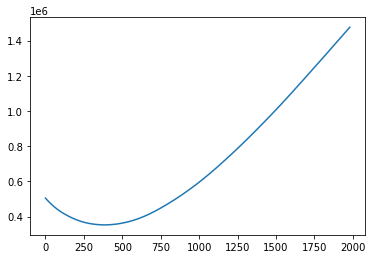

In [1]:

import matplotlib.pyplot as plt

def GetPostions(dataSet):
    data = []
    with open(dataSet) as f:
        data = f.readlines()
    
    data = data[0].strip().split(',')

    values = []
    for i in range(len(data)):
        values.append(int(data[i]))

    return values

postions = GetPostions('./data/aoc7.txt')

def calculateFuelConsumption(postions):
    consumption = []
    for i in range(min(postions),max(postions)):
        fuel = 0
        for j in postions:
            # add absolut value of the difference
            fuel += abs(j-i)
        consumption.append([i,fuel])
    return consumption        

fuelConsumption = calculateFuelConsumption(postions)

# find minimum fuel consumption
def findMinFuelConsumption(fuelConsumption):
    minFuel = fuelConsumption[0][1]
    minFuelIndex = 0
    for i in range(len(fuelConsumption)):
        if fuelConsumption[i][1] < minFuel:
            minFuel = fuelConsumption[i][1]
            minFuelIndex = i
    return minFuelIndex

print(fuelConsumption[ findMinFuelConsumption(fuelConsumption)])


# split the data into x and y

def PlotFuelConsumption(fuelConsumption):
    x = []
    y = []
    for i in range(len(fuelConsumption)):
        x.append(fuelConsumption[i][0])
        y.append(fuelConsumption[i][1])

    plt.plot(x,y)
    plt.show()

PlotFuelConsumption(fuelConsumption)



Assignment 7.2

In [ ]:
def calculateNewFuelConsumption(postions):
    consumptionAtDistance = []
    # Create a list of all the fuel consumption
    for i in range(0,max(postions)-min(postions)+1):
        consumptionAtDistance.append(sum(range(i+1)))
    consumption = []

    for i in range(min(postions),max(postions)):
        fuel = 0
        for j in postions:
            
            distance = abs(j-i)
            fuel += consumptionAtDistance[distance]
        consumption.append([i,fuel])
    return consumption  

postions = GetPostions('./data/aoc7.txt')
fuelConsumption = calculateNewFuelConsumption(postions)
print(fuelConsumption[ findMinFuelConsumption(fuelConsumption)])
PlotFuelConsumption(fuelConsumption)